<a href="https://colab.research.google.com/github/harrier999/opensource/blob/master/opsrc_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from __future__ import absolute_import, division, print_function, unicode_literals
import cv2
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import numpy as np

size = 5 #기본 = 28

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

i=0
x_train2 = np.zeros((60000,size,size))
x_test2 = np.zeros((10000,size,size))
while(i<60000):
  x_train2[i] = (cv2.resize(x_train[i], dsize=(size, size), fx=0, fy=0, interpolation=cv2.INTER_CUBIC))
  i = i+1
i=0
while(i<10000):
  x_test2[i] = (cv2.resize(x_test[i], dsize=(size, size), fx=0, fy=0, interpolation=cv2.INTER_CUBIC))
  i = i+1


x_train2, x_test2 = x_train2 / 255.0, x_test2 / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(size, size)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train2, y_train, epochs=5)

model.evaluate(x_test2,  y_test, verbose=2)



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 1.2697 - accuracy: 0.5808
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 1.0795 - accuracy: 0.6350
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 1.0270 - accuracy: 0.6509
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.9949 - accuracy: 0.6635
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9716 - accuracy: 0.6695
10000/1 - 0s - loss: 0.6555 - accuracy: 0.6895


[0.9052196457862854, 0.6895]

In [51]:
x_train2.shape

(60000, 56, 56)

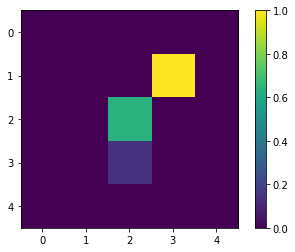

In [89]:
import matplotlib.pyplot as plt




x_train2[10000].shape
plt.figure()
plt.imshow(x_train2[433]) #INTER_LANCZOS4, INTER_CUBIC 둘중 하나 선택 
plt.colorbar()
plt.grid(False)
plt.show()